In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def calc_target_size(img_size: int ,kernel_size: int)-> int:
  num_pixels  = 0

  for i in range(img_size):
    added = i + kernel_size
    if added <= img_size:
      num_pixels+=1
  return num_pixels  

In [4]:
def convolve(img: np.array,kernel: np.array):
    
    height,width,c = img.shape[0],img.shape[1],img.shape[2]

    K_height,K_width = kernel.shape[0],kernel.shape[1]

    convolved_img = np.zeros((height-K_height+1,width-K_width+1,3))

    #with padding
    for i in range(K_height//2,height-K_height//2 -1):
        for j in range(K_width//2,width-K_width//2-1):

            subset = img[i-K_height//2:i+K_height//2+1,j-K_width//2:j+K_width//2+1]

            convolved_img[i,j,0] = int((subset[:,:,0]*kernel).sum())
            convolved_img[i,j,1] = int((subset[:,:,1]*kernel).sum())
            convolved_img[i,j,2] = int((subset[:,:,2]*kernel).sum())

    convolved_img = np.clip(convolved_img,0,255)
    return convolved_img.astype(np.uint8)

        


In [5]:
blur = np.array([[
    [0.0625,0.125,0.0625],
    [0.125,0.25,0.125],
    [0.0625,0.125,0.0625]
]])

edge = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

v_edge = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

h_edge = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

bblur = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])



In [6]:
list_kernerls = (blur,edge,sharpen)

In [7]:
img = Image.open('cat.jpg')
img = np.asarray(img)

In [8]:
def show_img(img: str,kernel: str):
    # if kernel == 'blur':
    #     kernel = blur
    # elif kernel == 'edge':
    #     kernel = edge
    # else:
    #     kernel = sharpen
    kernel_map = {
        'blur':blur,
        'BoxBlur':bblur,
        'edge':edge,
        'sharpen':sharpen,
        'VerticalEdge':v_edge,
        'HorizontalEdge':h_edge
    }
    selected_kernel = kernel_map.get(kernel,sharpen)
    img = Image.open(img)
    img = np.asarray(img)
    image = convolve(img,selected_kernel)
    # image = Image.fromarray(image)
    # image.show()
    plt.imshow(image)
    

In [9]:
# image = convolve(img,blur)
# plt.imshow(image)
# image = Image.fromarray(image)
# image.show()


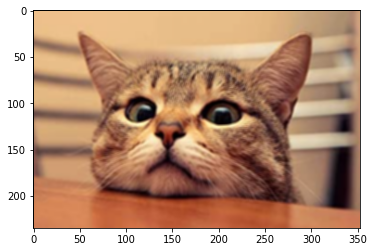

In [10]:
show_img('cat.jpg','BoxBlur')

In [11]:
import pickle

In [16]:
with open('show.pkl', 'wb') as f:
    pickle.dump(show_img, f)

In [24]:
with open('show_img.pickle', 'wb') as f:
    pickle.dump(show_img, f)

In [25]:
import h5py

In [28]:
function_info = {
    'function': show_img
    # Add any other necessary information here
}

In [30]:
with open('show_img.pkl', 'wb') as f:
    pickle.dump(show_img, f, protocol=pickle.HIGHEST_PROTOCOL)